In [16]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.table import QTable
import pandas as pd

from cluster import Cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
galwcls=pd.read_csv('galwcls.dat', sep='|', header=None)
galwcls

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,230.65973,27.743846,0.073177,21137.1930,215.714310,1.151608,123,1132.33920,101.61069,...,706.55424,58.271875,66.024455,3.242931e+15,8.542350e+14,0.41,0.108,3.060947e+14,8.062983e+13,4.289865
1,2,227.55402,33.498096,0.113908,32215.0730,332.547940,0.995621,45,1007.64840,117.03122,...,695.01505,70.548011,87.329623,2.066015e+15,5.423286e+14,0.32,0.084,1.879991e+14,4.934977e+13,4.722965
2,3,194.93502,27.912461,0.023372,6924.9620,69.697942,1.017135,485,992.56078,57.267749,...,750.50479,31.102345,36.234082,2.028706e+15,5.163977e+14,0.33,0.084,1.852209e+14,4.714713e+13,4.681364
3,4,258.20851,64.052953,0.080997,23301.8680,238.327350,0.945980,103,863.31423,93.59082,...,683.99230,53.824022,57.867753,1.909044e+15,5.159577e+14,0.37,0.100,1.864585e+14,5.039419e+13,3.928135
4,5,209.83093,27.968947,0.075065,21661.5240,221.182270,0.990827,56,858.50327,103.13901,...,632.52100,58.691426,64.041931,1.392339e+15,3.978109e+14,0.14,0.040,9.659857e+13,2.759959e+13,10.349945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1796,219.29860,41.137525,0.018229,5415.0324,54.423323,0.314627,5,360.63167,92.448916,...,189.87618,44.119997,74.421318,1.826270e+14,5.357056e+13,0.45,0.132,2.996108e+13,8.788582e+12,1.208494
1796,1797,244.13139,17.296896,0.083403,23964.1060,245.265940,0.359730,6,294.11717,80.559921,...,259.43799,60.280624,90.334207,7.535574e+13,5.167240e+13,0.07,0.048,5.782326e+12,3.965023e+12,7.608282
1797,1798,195.66504,62.490557,0.076106,21950.0540,224.193750,0.335472,7,368.78647,96.806856,...,240.86964,47.940672,60.913385,1.148334e+14,3.062213e+13,0.21,0.056,1.340652e+13,3.575071e+12,2.541560
1798,1799,122.19122,38.880306,0.040514,11899.8630,120.340620,0.360137,24,303.70400,85.373054,...,299.56166,50.786730,104.798740,8.062803e+13,2.508424e+13,0.09,0.028,6.722908e+12,2.091572e+12,5.992770


In [18]:
galwcls[:][13]

0       1.758845
1       1.511349
2       1.544850
3       1.453410
4       1.448992
          ...   
1795    0.543822
1796    0.532580
1797    0.533728
1798    0.539349
1799    0.536780
Name: 13, Length: 1800, dtype: float64

In [19]:
galwcls[0:1][1]

0    230.65973
Name: 1, dtype: float64

In [23]:
cls_data = {'sig500': galwcls[:][8],
            'M500': galwcls[:][11],
            'r200': galwcls[:][13],
            'sig200':galwcls[:][15],
            'M200':galwcls[:][18]}

units = {'sig500': u.km/u.s,
            'M500': u.Msun,
            'r200': u.Mpc,
            'sig200': u.km/u.s,
            'M200': u.Msun, }

In [24]:
cls_table = QTable(cls_data, units=units)

In [25]:
cls_table

sig500,M500,r200,sig200,M200
km / s,solMass,Mpc,km / s,solMass
float64,float64,float64,float64,float64
1132.3392,950649090000000.0,1.7588447,1042.086,1354718300000000.0
1007.6484,639463590000000.0,1.5113488,926.75761,894721140000000.0
992.56078,624866900000000.0,1.54485,932.60305,875729550000000.0
863.31423,530946780000000.0,1.4534098,881.24884,770246600000000.0
858.50327,606589610000000.0,1.4489923,842.65332,758855720000000.0
934.17466,361477570000000.0,1.43097,886.46345,733230760000000.0
...,...,...,...,...
307.6751,25382889000000.0,0.53672518,280.27435,38122360000000.0


In [26]:
cls_table['sig500']

<Quantity [1132.3392 , 1007.6484 ,  992.56078, ...,  368.78647,  303.704  ,
            292.17797] km / s>

Text(0.5, 1.0, 'fx=1')

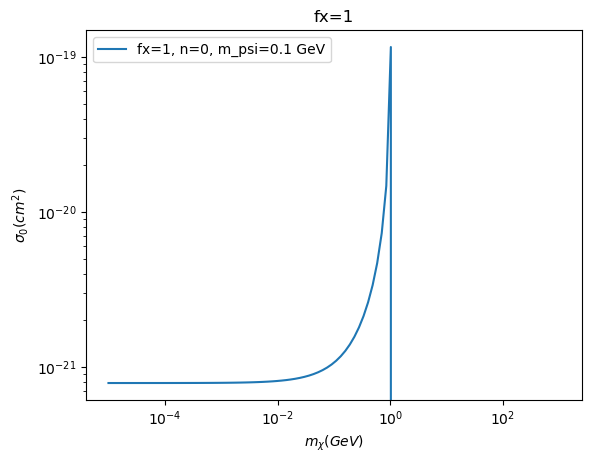

In [27]:
i = 1
test_cluster = Cluster(cls_table['r200'][i], cls_table['M200'][i], cls_table['sig200'][i], m500=cls_table['M500'][i])
test_cluster.plot_sigma0_vs_m_chi()
plt.title('fx=1')

In [28]:
test_cluster.agn_heating_rate()

<Quantity 1.19917629e+53 GeV / s>

In [29]:
test_cluster.radiative_cooling_rate()

<Quantity 4.53317859e+49 GeV / s>

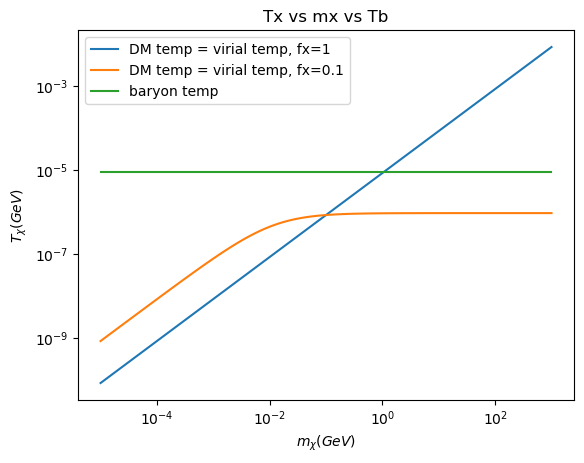

In [30]:
test_cluster.plot_T_chi_vs_m_chi()
test_cluster.plot_T_chi_vs_m_chi(f_chi = 0.1, m_psi=0.1*u.GeV)
plt.loglog(test_cluster.m_chi, test_cluster.baryon_temp * np.ones(100), label='baryon temp')
plt.title('Tx vs mx vs Tb')
plt.legend()

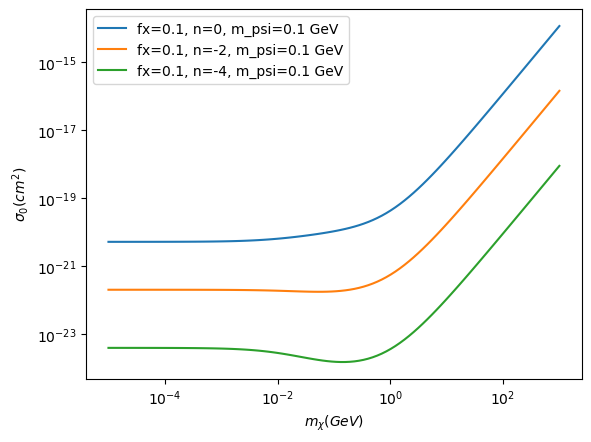

In [31]:
test_cluster.plot_sigma0_vs_m_chi(f_chi = [0.1], m_psi=[0.1*u.GeV], n=[0,-2,-4])

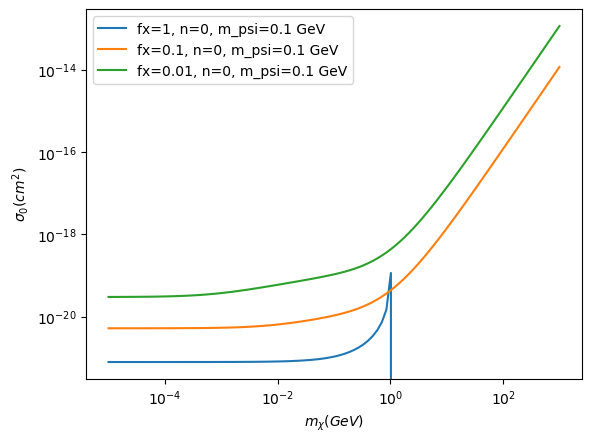

In [32]:
test_cluster.plot_sigma0_vs_m_chi(f_chi = [1, 0.1, 0.01], m_psi=[0.1*u.GeV], n=[0])

In [33]:
np.min(test_cluster.sigma0(f_chi = 0.1, m_psi=0.1*u.GeV, n=-4)) #

<Quantity 1.51385598e-24 cm2>

[None, None, None, None, None]

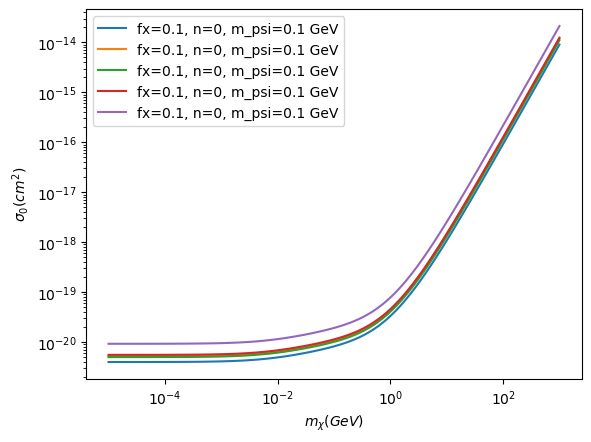

In [35]:
clusters = [Cluster(cls_table['r200'][i], cls_table['M200'][i], cls_table['sig200'][i], m500=cls_table['M500'][i]) for i in range(5)]
[cluster.plot_sigma0_vs_m_chi(f_chi = [0.1], m_psi=[0.1*u.GeV]) for cluster in clusters]


In [36]:
clusters[0].radiative_cooling_rate()

<Quantity 8.67838532e+49 GeV / s>

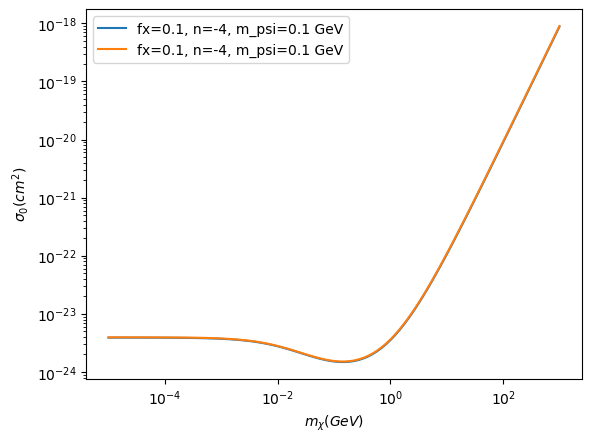

In [37]:
clusters[0].plot_sigma0_vs_m_chi(f_chi = [0.1], m_psi=[0.1*u.GeV], n=[-4])
clusters[1].plot_sigma0_vs_m_chi(f_chi = [0.1], m_psi=[0.1*u.GeV], n=[-4])

In [45]:
r200_avg = np.mean(cls_table['r200'])
M200_avg = np.mean(cls_table['M200'])
sig200_avg = np.mean(cls_table['sig200'])
M500_avg = np.mean(cls_table['M500'])

In [46]:
r200_avg, M200_avg, sig200_avg, M500_avg

(<Quantity 0.7455313 Mpc>,
 <Quantity 1.21360536e+14 solMass>,
 <Quantity 429.34263199 km / s>,
 <Quantity 8.50139992e+13 solMass>)

In [47]:
cls_avg = Cluster(r200_avg, M200_avg, sig200_avg, m500=M500_avg)

In [48]:
cls_avg.baryon_temp, cls_avg.n_e, (cls_avg.volume).to(u.cm**3)

(<Quantity 1.92440032e-06 GeV>,
 <Quantity 0.00028291 1 / cm3>,
 <Quantity 5.09962078e+73 cm3>)

<Quantity 8.50139992e+13 solMass>

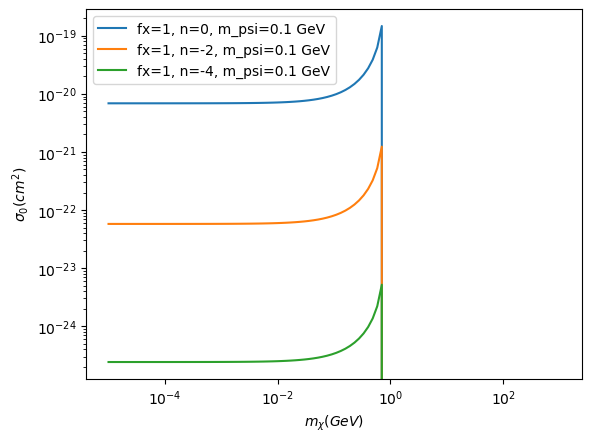

In [49]:
cls_avg.plot_sigma0_vs_m_chi(n=[0,-2,-4])
cls_avg.m500

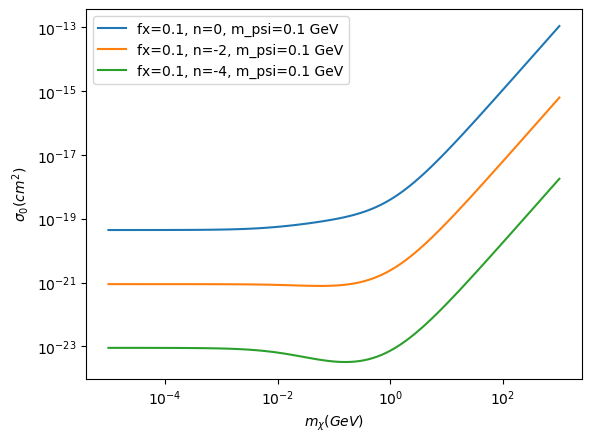

In [50]:
cls_avg.plot_sigma0_vs_m_chi(f_chi=[0.1], n=[0,-2,-4])

In [52]:
i=2
L_cluster = Cluster(cls_table['r200'][i], cls_table['M200'][i], cls_table['sig200'][i], v500=cls_table['sig500'][i])

In [53]:
L_cluster.luminosity()

<Quantity 3.50864343e+55 GeV / s>

In [54]:
(L_cluster.cooling_time()).to(u.Gyr)

<Quantity 1.28058155e-06 Gyr>

In [56]:
clusters = [Cluster(cls_table['r200'][i], cls_table['M200'][i], cls_table['sig200'][i], v500=cls_table['sig500'][i]) for i in galwcls[:-1][0]]
luminosities = [cluster.luminosity() for cluster in clusters]

In [57]:
luminosities = [(cluster.luminosity()).value for cluster in clusters]
temperatures = [(cluster.T500).value for cluster in clusters]

Text(0, 0.5, 'L (GeV/s)')

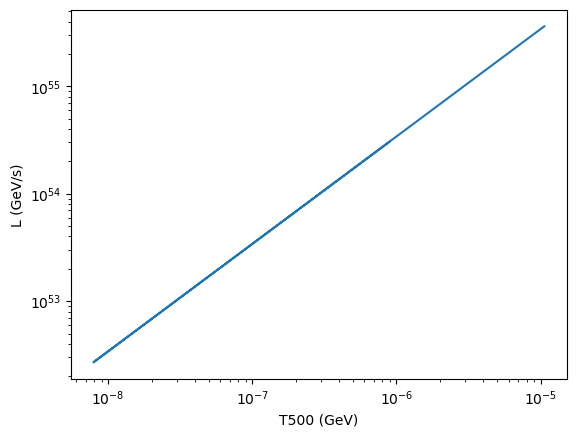

In [58]:
plt.loglog(temperatures, luminosities)
plt.xlabel('T500 (GeV)')
plt.ylabel('L (GeV/s)')